<a href="https://colab.research.google.com/github/Annie-jain/OrientedBoundingbox-Angle/blob/main/orientedAngleObjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**orineted bounding box and its angle**


In [20]:

import json
import cv2
import os
import matplotlib.pyplot as plt
import shutil
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
import os
os.makedirs("dataset", exist_ok=True)

[251, 148, 297, 148, 297, 283, 251, 283]
[[251 148]
 [297 148]
 [297 283]
 [251 283]]
90.0
Angle: 5156.62


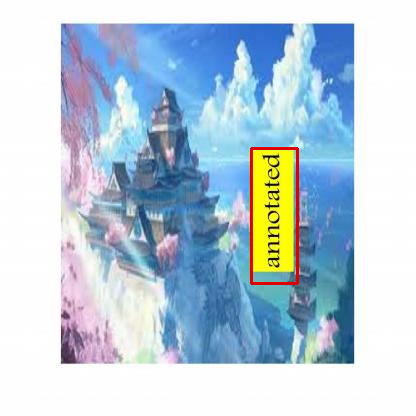

In [34]:
import cv2

import math
from google.colab.patches import cv2_imshow

# Path to the YOLO dataset in .txt format
dataset_path = '/content/An_26_90_Image141_jpg.rf.8d291e6f0c56221bfb9634cbd878bf99.txt'

# Path to the image file
image_path = '/content/An_26_90_Image141_jpg.rf.8d291e6f0c56221bfb9634cbd878bf99.jpg'

# Load the image
img = cv2.imread(image_path)
h,w,c= img.shape
# Loop over all lines (object instances) in the dataset
with open(dataset_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().split(' ')

    # Extract coordinates of bounding box corners
    bbox = [int(float(line[i])) for i in range(8)]
    print(bbox)
    bbox = [(bbox[i], bbox[i+1]) for i in range(0, 8, 2)]
    bbox = np.array(bbox)
    print(bbox)

    # Draw the bounding box on the image
    cv2.polylines(img, [bbox], True, (0, 0, 225), 2)

    # Compute the angle of the bounding box
    center, size, angle = cv2.minAreaRect(bbox)
    
    print(angle)
    # Convert angle from radians to degrees
    angle_degrees = angle * 180 / math.pi

    # Print the angle
    print(f"Angle: {angle_degrees:.2f}")

# Show the image with bounding boxes
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()


[258, 79, 300, 114, 149, 297, 107, 263]
[[258  79]
 [300 114]
 [149 297]
 [107 263]]
((321.5, 360.5), (3.0, 7.0), 90.0)


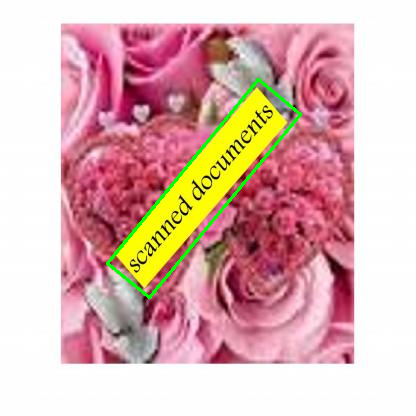

-1

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math
# Load image, convert to grayscale, Otsu's threshold for binary image
dataset_path = '/content/An_26_45_Image26--12-_jpg.rf.22fef613ee638b049e814b339a0882a6.txt'

# Path to the image file
image_path = '/content/An_26_45_Image26--12-_jpg.rf.22fef613ee638b049e814b339a0882a6.jpg'

# Load the image
img = cv2.imread(image_path)
h,w,c= img.shape

with open(dataset_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip().split(' ')

    # Extract coordinates of bounding box corners
    bbox = [int(float(line[i])) for i in range(8)]
    print(bbox)
    bbox = [(bbox[i], bbox[i+1]) for i in range(0, 8, 2)]
    bbox = np.array(bbox)
    print(bbox)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
rect = cv2.minAreaRect(cnts[0])
print(rect)
box = np.int0(cv2.boxPoints(rect))

cv2.drawContours(img,[bbox],0,(0,255,0),2)
# OR
# cv2.polylines(image, [box], True, (36,255,12), 3)

cv2_imshow( img)
cv2.waitKey()

In [13]:
import os
import numpy as np
import cv2
import math

# Path to the YOLO dataset in .txt format
dataset_path = '/content/An_26_45_Image26--12-_jpg.rf.22fef613ee638b049e814b339a0882a6.txt'
img= cv2.imread('/content/An_26_90_Image141_jpg.rf.8d291e6f0c56221bfb9634cbd878bf99.jpg')

h,w,c= img.shape

angle_rad = math.atan2(h, w)
angle_degrees = angle_rad * 180 / math.pi
print(angle_degrees)

45.0


IMPLEMENTING YOLO ON CUSTOM DATASET

In [ ]:
!pip install tensorflow
import torch

In [ ]:
from IPython.display import Image

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone


In [ ]:
%cd yolov5


In [ ]:
!pip install -qr requirements.txt  # install

In [ ]:
import os
os.makedirs("/content/yolov5/dataset", exist_ok=True)

In [ ]:

os.makedirs("/content/yolov5/dataset/images", exist_ok=True)
os.makedirs("/content/yolov5/dataset/labels", exist_ok=True)

In [ ]:
!mkdir "/content/yolov5/dataset/images/train"
!mkdir "/content/yolov5/dataset/images/valid"

!mkdir "/content/yolov5/dataset/labels/train"
!mkdir "/content/yolov5/dataset/labels/valid"